In [98]:
# Medicações
# A, B, C, D, E

# Cada medicação tem 
# grau: subida, plato, descida
# duracao: subida, plato, descida

medicines = [
        {'nome': 'PROLOPA 1',
        'subida1': {'grau': 0.3, 'duracao': 60}, 
        'subida2': {'grau': 1.0, 'duracao': 60}, 
        'plato'  : {'grau': -0.1, 'duracao': 180}, 
        'descida': {'grau': 0, 'duracao': 60}
        },
        {'nome': 'PROLOPA 2',
        'subida1': {'grau': 0, 'duracao': 25}, 
        'subida2': {'grau': 1.9, 'duracao': 25}, 
        'plato'  : {'grau': -0.2, 'duracao': 120}, 
        'descida': {'grau': 0, 'duracao': 30}
        }    
]

In [99]:
dia =  {'00': {},
        '01': {},
        '02': {'med': med1, 'dose': 100},
        '03': {},
        '04': {},
        '05': {},
        '06': {},
        '07': {'med': med1, 'dose': 100},
        '08': {},
        '09': {},
        '10': {},
        '11': {},
        '12': {},
        '13': {},
        '14': {'med': med1, 'dose': 100},
        '15': {},
        '16': {},
        '17': {},
        '18': {},
        '19': {},
        '20': {},
        '21': {},
        '22': {},
        '23': {}
}

In [100]:
# Registrar a concentração de dopamina 
dopaDia  = [0 for i in range(24*60)]
arrayDia = [i for i in range(24*60)]


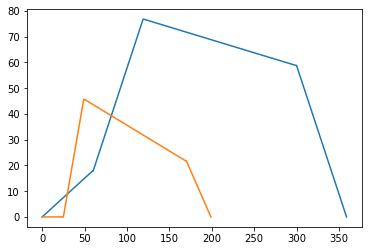

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def searchMedicine(medicines, medicine):
    return next(item for item in medicines if item["nome"] == medicine)

def calculateDose(medicine):
    
    medicine       = searchMedicine(medicines, medicine)
    
    grauSubida1    = medicine['subida1']['grau']
    subida1Duracao = medicine['subida1']['duracao']
    grauSubida2    = medicine['subida2']['grau']
    subida2Duracao = medicine['subida2']['duracao']
    grauPlato      = medicine['plato']['grau']
    platoDuracao   = medicine['plato']['duracao']
    grauDescida    = medicine['descida']['grau']
    descidaDuracao = medicine['descida']['duracao']
    
    xSubida1 = np.arange(subida1Duracao)
    ySubida1 = grauSubida1 * xSubida1 
    
    xSubida2 = np.arange(subida2Duracao)
    ySubida2 = xSubida2 * grauSubida2 + ySubida1[-1]
    
    xPlato = np.arange(platoDuracao)
    yPlato = xPlato * grauPlato + ySubida2[-1]
    
    xDescida = np.arange(descidaDuracao)
    yDescida = -yPlato[-1]/xDescida[-1] * xDescida + yPlato[-1]
    
    arrayContrib = np.concatenate([ySubida1, ySubida2, yPlato, yDescida]) 
    
    return arrayContrib
    
plt.plot(calculateDose('PROLOPA 1'))
plt.plot(calculateDose('PROLOPA 2'))


In [61]:
import json
import numpy as np

for hora in dia:
    minutoAtual = int(hora)*60
    x = [0]
    y = [0]
    
    horaInicial = 0
    
    if dia[hora]:
        
        subida1Grau = dia[hora]['med']['subida1']['grau']
        subida1Duracao = dia[hora]['med']['subida1']['duracao']
        horaFinal = subida1Duracao
        x = np.linspace(horaInicial, horaFinal, horaFinal-horaInicial)
        y = subida1Grau * x
               
        for i in range(horaFinal-horaInicial):
            dopaDia[int(hora)*60+i] = dopaDia[int(hora)*60+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        subida2Grau = dia[hora]['med']['subida2']['grau']
        subida2Duracao = dia[hora]['med']['subida1']['duracao']
        horaFinal = subida2Duracao
        x = np.linspace(horaInicial, horaFinal, (horaFinal-horaInicial))
        y = subida2Grau * x + dopaDia[minutoAtual-1]
               
        for i in range((horaFinal-horaInicial)):
            posicaoInicial = int(hora)*60+subida1Duracao
            dopaDia[posicaoInicial+i] = dopaDia[posicaoInicial+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        platoGrau = dia[hora]['med']['plato']['grau']
        platoDuracao = dia[hora]['med']['plato']['duracao']
        horaFinal = platoDuracao
        x = np.linspace(horaInicial, horaFinal, horaFinal-horaInicial)
        y = platoGrau * x + dopaDia[minutoAtual-1]
               
        for i in range(horaFinal-horaInicial):
            posicaoInicial = int(hora)*60+subida1Duracao+subida2Duracao
            dopaDia[posicaoInicial+i] = dopaDia[posicaoInicial+i] + y[i]
            minutoAtual = minutoAtual + 1
            
        descidaGrau = dia[hora]['med']['descida']['grau']
        descidaDuracao = dia[hora]['med']['descida']['duracao']
        horaFinal = descidaDuracao
        x = np.linspace(horaInicial, horaFinal, horaFinal-horaInicial)
        y = -dopaDia[minutoAtual-1]/x[horaFinal-horaInicial-1] * x + dopaDia[minutoAtual-1]
               
        for i in range(horaFinal-horaInicial):
            posicaoInicial = int(hora)*60+subida1Duracao+subida2Duracao+platoDuracao
            dopaDia[posicaoInicial+i] = dopaDia[posicaoInicial+i] + y[i]
            minutoAtual = minutoAtual + 1

#     y = dia[hora]['subida1']['grau']*x
#     diaItem = json.loads(dia[hora])
#     print(diaItem)

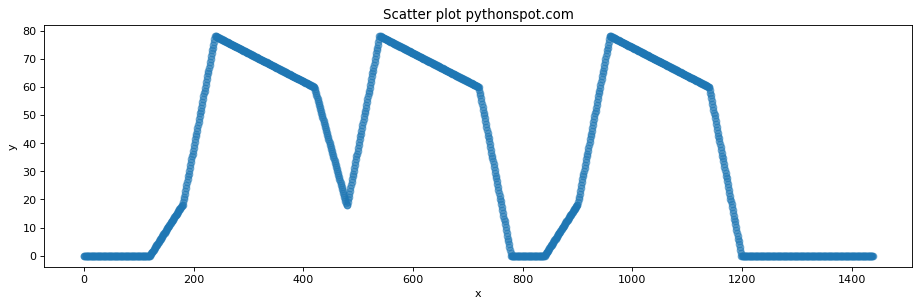

In [62]:
# Plot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(14, 4), dpi=80)

y = dopaDia
x = arrayDia

plt.scatter(x, y,alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()